# Admission Prediction using Multiple Linear Regression Model

**Objective:**
* To find probability for a student to get an admission in the university before applying the admission-form.

**Data:**
* 700 rows and 8 columns.

**Data Description:**
The dataset contains information about a student’s:
* Graduate Record Examination Score (GRE)
* Test of English as a Foreign Language Score (TOEFL)
* University Ratings
* Statement of Purpose Score (SOP)
* Letter of Recommendation Score (LOR)
* Cumulative Grade Point Average (CGPA)
* Whether the student has done any Research
* Chance of Admission (What we’re trying to predict)

**Environment and tools:**
* **Scikit-learn:** pretrained models
* **Seaborn:** data visualization
* **Numpy:** numerical computing
* **Pandas:** data manipulation
* **Pickle:** model extraction

**Linear Regression:**
It is statistical method which is used to obtain formulas to predict the values of one variable from another where there is a relationship between the 2 variables.
The formula for simple linear regression is that of a straight-line y=mx+c.
The variables y and x in the formula is the one whose relationship will be determined.

Both the variables are named as below:
1. Y: Dependent variable.
2. X: Independent variable.


The above equation is more equivalent to the slope intercept form in which the dependent variable is denoted by y, and c denotes the intercept, m denotes the slope, and x is the independent variable. So, if we are given a particular Independent Variable x, the regression model would basically compute the results of c and m which would minimize the absolute difference between the dependent variable y which is the actual value we have and the predicted value of y.

**Steps:**
1.	Data Collection
2.	Data Cleaning
3.	Data Pre-Processing
4.	Feature Extraction
5.	Data Visualization
6.	Model Extraction(Webpage Integration)


> **Importing the Required Libraries for the Model**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

# 1. Data Collection 

**Link of the Dataset:** https://www.kaggle.com/mohansacharya/graduate-admissions

> **Loading the Dataset into the Program**

In [2]:
dataset = pd.read_csv("data.csv")
print("Shape of the DataSet is (Rows,Cols) = ", dataset.shape)
dataset.head()

Shape of the DataSet is (Rows,Cols) =  (700, 8)


GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

# 2. Data Cleaning

> **Removing Null Values from the Dataset**

In [3]:
dataset.dropna(inplace=True)
print("Revised Shape of the DataSet is (Rows,Cols) = ", dataset.shape)
dataset.head()

Revised Shape of the DataSet is (Rows,Cols) =  (591, 8)


GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

# 3. Data Pre-Processing

> **Deriving Dataset based on the Attribute Values of "GRE SCORE"**

In [4]:
dataset = dataset[(dataset["GRE Score"] >= 260) & (dataset["GRE Score"] <= 340)]
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

> **Deriving Dataset based on the Attribute Values of "TOEFL SCORE"**

In [5]:
dataset = dataset[(dataset["TOEFL Score"] >= 0) & (dataset["TOEFL Score"] <= 120)]
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

> **Deriving Dataset based on the Attribute Values of "UNIVERSITY RATING"**

In [6]:
dataset = dataset[(dataset["University Rating"] >= 0.0) & (dataset["University Rating"] <= 5.0)]
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

> **Deriving Dataset based on the Attribute Values of "SOP (STATEMENT OF PURPOSE)**"

In [7]:
dataset = dataset[(dataset.SOP >= 0.0) & (dataset.SOP <= 5.0)]
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

> **Deriving Dataset based on the Attribute Values of "LOR (LETTER OF RECOMMENDATION)"**

In [8]:
dataset = dataset[(dataset.LOR >= 0.0) & (dataset.LOR <= 5.0)]
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

> **Deriving Dataset based on the Attribute Values of "CGPA (CUMMULATIVE GRADE POINT AVERAGE)"**

In [9]:
dataset = dataset[(dataset["CGPA"] >= 0.0) & (dataset["CGPA"] <= 10.0)]
dataset.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0   
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0   
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0   
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0   
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

# 4. Feature Extraction

> **Extracting FEATURES (LABELS) from the dataset**

In [10]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [11]:
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0      337.0        118.0                4.0  4.5  4.5  9.65       1.0
1      324.0        107.0                4.0  4.0  4.5  8.87       1.0
2      316.0        104.0                3.0  3.0  3.5  8.00       1.0
3      322.0        110.0                3.0  3.5  2.5  8.67       1.0
4      314.0        103.0                2.0  2.0  3.0  8.21       0.0

In [12]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

> **Splitting the Dataset into TRAIN DATA & TEST DATA for Model Training**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> **Implementing the LINEAR REGRESSION Model**

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

> **Predicting the TEST Dataset values**

In [15]:
y_pred = regressor.predict(X_test)
print("Total number of values in the test dataset =", y_pred.size)

Total number of values in the dataset = 173


> **ACCURACY of the Model**

In [16]:
print("Accuracy : " + format(regressor.score(X_test,y_test) * 100,'.2f') + "%")

Accuracy : 78.68%


# 5. Data Visualization

> **Visualizing the Graph based on "GRE SCORE" vs "CHANCES OF ADMISSION"**

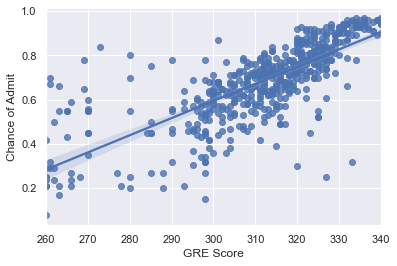

In [17]:
sns.set_theme(color_codes=True)
sns.regplot(x="GRE Score", y="Chance of Admit", data=dataset);

> **Visualizing the Graph based on "TOEFL SCORE" vs "CHANCES OF ADMISSION"**

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


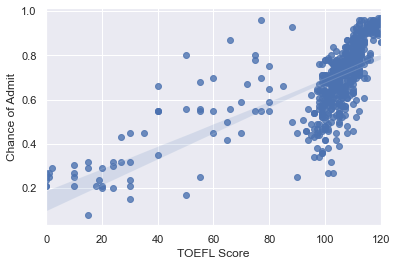

In [18]:
sns.regplot(x="TOEFL Score", y="Chance of Admit", data=dataset);

> **Visualizing the Graph based on "CGPA" vs "CHANCES OF ADMISSION"**

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


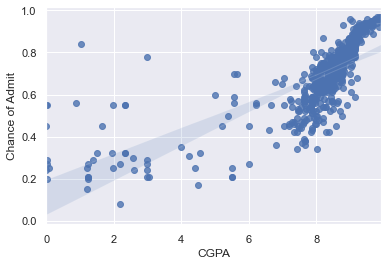

In [19]:
sns.regplot(x="CGPA", y="Chance of Admit", data=dataset);

> **Visualizing the Graph based on "UNIVERSITY RATING" vs "CHANCES OF ADMISSION"**

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


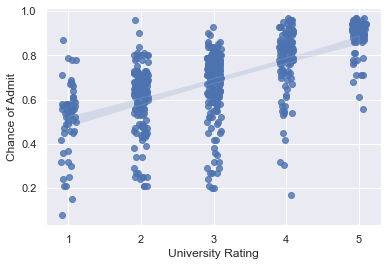

In [20]:
sns.regplot(x="University Rating", y="Chance of Admit", data=dataset, x_jitter=0.1);

> **Visualizing the Graph based on "SOP" vs "CHANCES OF ADMISSION"**

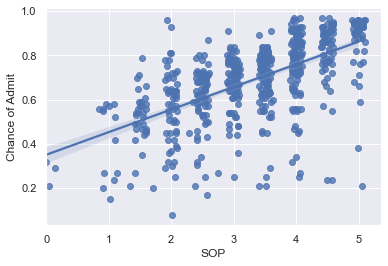

In [21]:
sns.regplot(x="SOP", y="Chance of Admit", data=dataset, x_jitter=0.1);

> **Visualizing the Graph based on "LOR" vs "CHANCES OF ADMISSION"**

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


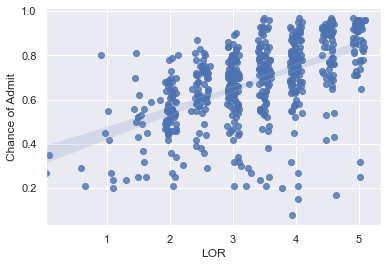

In [22]:
sns.regplot(x="LOR", y="Chance of Admit", data=dataset, x_jitter=0.1);

> **Visualizing the Graph based on "RESEARCH" vs "CHANCES OF ADMISSION"**

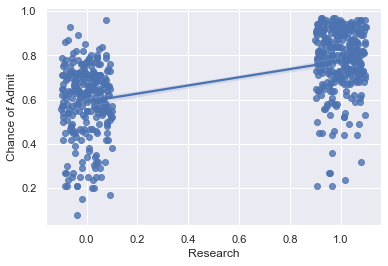

In [27]:
sns.regplot(x="Research", y="Chance of Admit", data=dataset, x_jitter=0.1);

> **Predicting the CHANCES OF ADMISSION based on the Given Data values**

In [28]:
data = np.array([310,106,3,4.3,4.1,8.71,1]).reshape(1,-1)
data = regressor.predict(data)
print("There is "+format(float(data*100),'.2f')+"% chances that you will get Admission.")

There is 77.84% chances that you will get Admission.


# 6. Model Extraction (For WebPage Integration)

In [25]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

# 7. Integration in Website

Integrated our trained model in website using flask.

![Input Form](form.png "Input Form")
![Output Form](formdata.png "Output Form")